White Gaussian Noise Signal Generated
Number of samples: 1000
Mean: 0.0193
Standard deviation: 0.9792
Variance: 0.9589


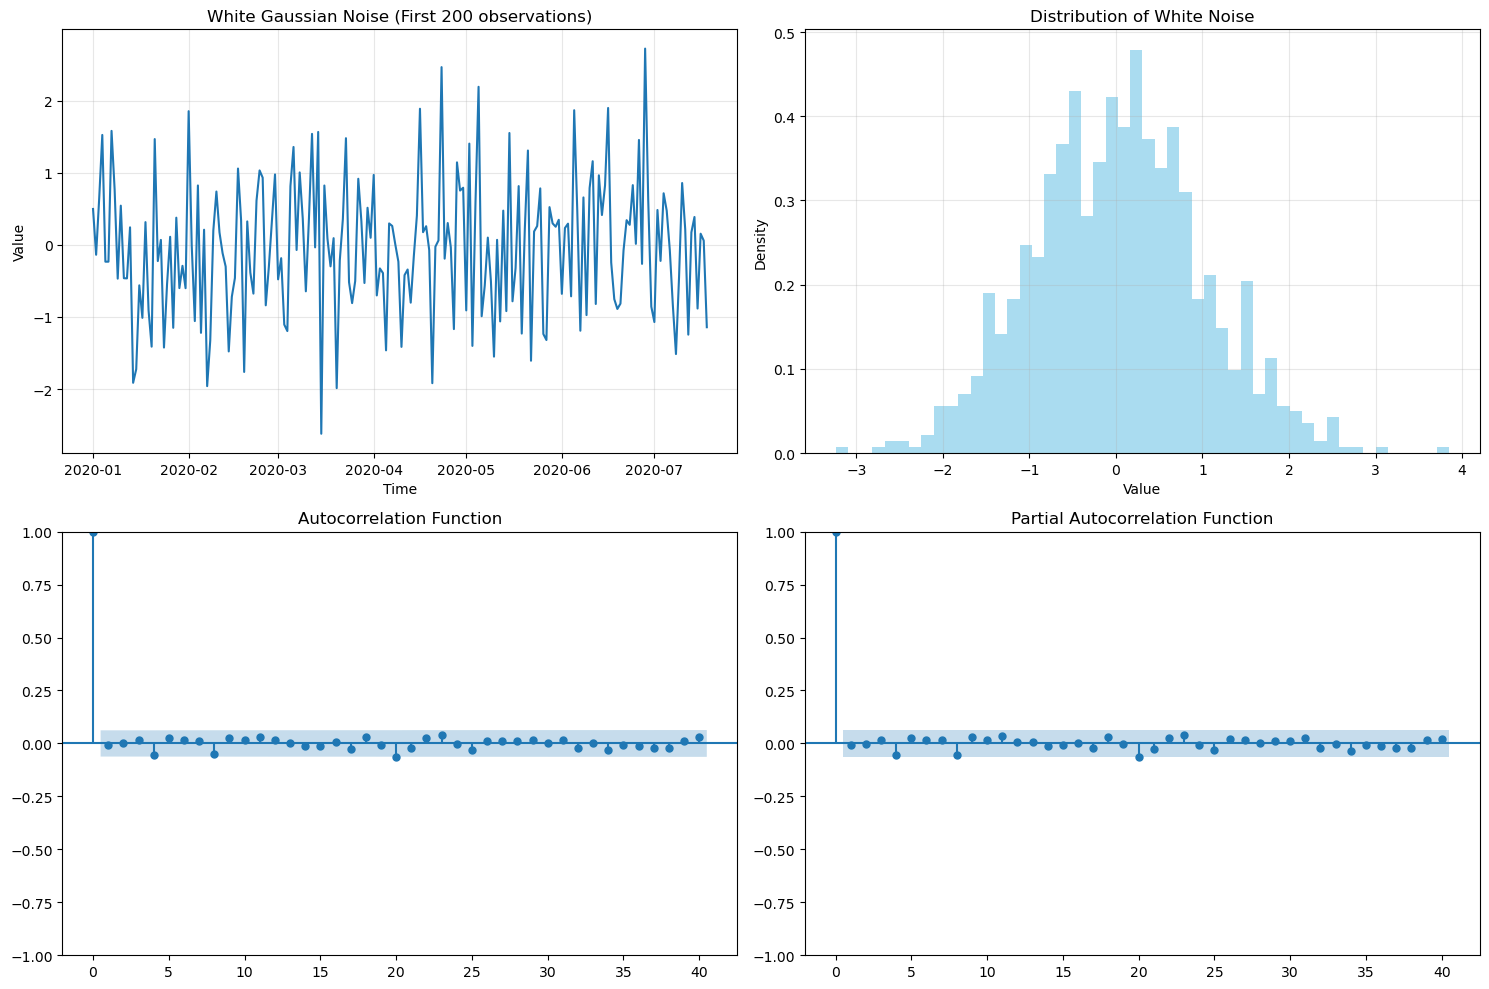


MODEL FITTING RESULTS

Fitting AR(1) model...
AR(1) Results:
  AIC: 2800.8145
  BIC: 2815.5378
  Log-likelihood: -1397.4072
  Residual variance: 0.9588
  Parameters: {'const': 0.019325586343055187, 'ar.L1': -0.0074749913490550594, 'sigma2': 0.9578361688270172}

Fitting AR(2) model...
AR(2) Results:
  AIC: 2802.8144
  BIC: 2822.4454
  Log-likelihood: -1397.4072
  Residual variance: 0.9588
  Parameters: {'const': 0.019322437745031375, 'ar.L1': -0.007453612562218066, 'ar.L2': -0.0002820186328564777, 'sigma2': 0.9578408953009218}

Fitting MA(1) model...
MA(1) Results:
  AIC: 2800.8145
  BIC: 2815.5377
  Log-likelihood: -1397.4072
  Residual variance: 0.9588
  Parameters: {'const': 0.019320665214732708, 'ma.L1': -0.007459598302859181, 'sigma2': 0.9578325997325106}

MODEL COMPARISON TABLE
   Model        AIC        BIC  Residual Variance  Log-Likelihood
0  AR(1)  2800.8145  2815.5378             0.9588      -1397.4072
1  AR(2)  2802.8144  2822.4454             0.9588      -1397.4072
2  MA(1

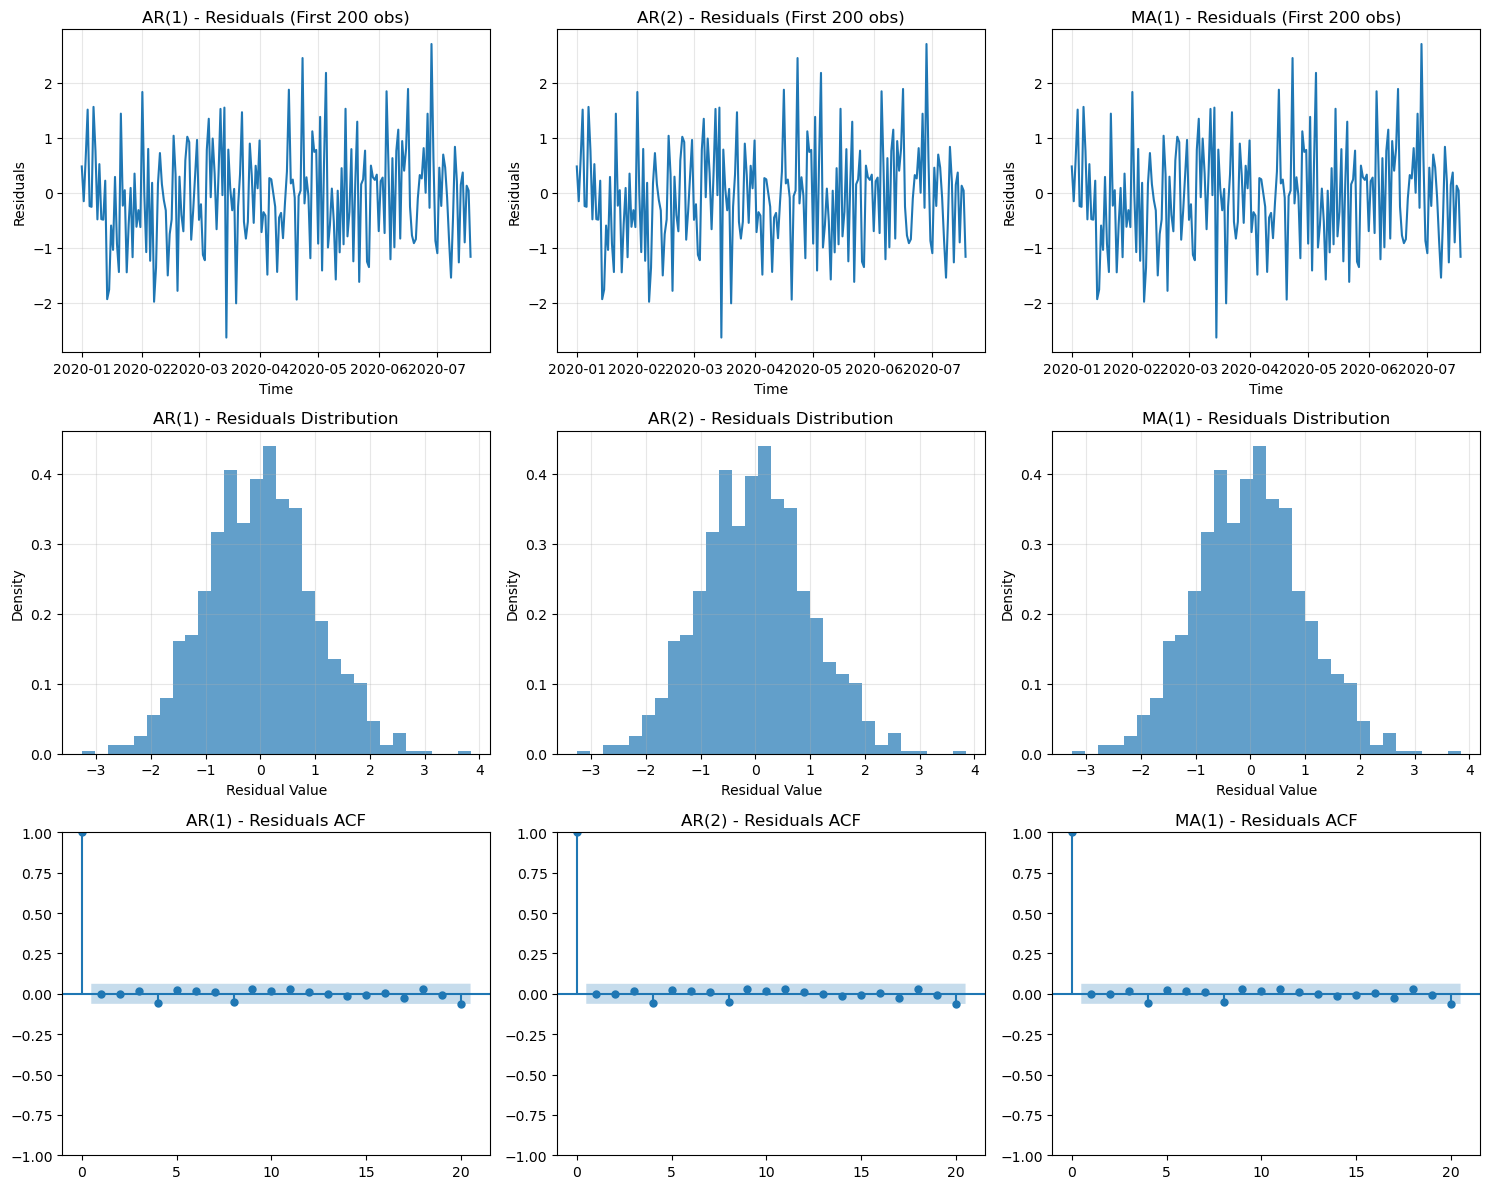


RESIDUALS STATISTICAL SUMMARY

AR(1) Residuals:
  Mean: 0.000002
  Std Dev: 0.979189
  Variance: 0.958810
  Min: -3.2612
  Max: 3.8371

AR(2) Residuals:
  Mean: 0.000006
  Std Dev: 0.979189
  Variance: 0.958810
  Min: -3.2614
  Max: 3.8372

MA(1) Residuals:
  Mean: 0.000007
  Std Dev: 0.979189
  Variance: 0.958810
  Min: -3.2612
  Max: 3.8371

LJUNG-BOX TEST FOR RESIDUAL AUTOCORRELATION
(Tests if residuals are independently distributed)
H0: Residuals are independently distributed
H1: Residuals are not independently distributed

AR(1):
  Ljung-Box p-value (lag 10): 0.671095
  Result: Fail to reject H0 (residuals appear independent)

AR(2):
  Ljung-Box p-value (lag 10): 0.671155
  Result: Fail to reject H0 (residuals appear independent)

MA(1):
  Ljung-Box p-value (lag 10): 0.671094
  Result: Fail to reject H0 (residuals appear independent)

ANALYSIS INSIGHTS

1. EXPECTED RESULTS FOR WHITE GAUSSIAN NOISE:
   - All models should perform similarly since white noise has no structure
   - A

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

n_samples = 1000
white_noise = np.random.normal(0, 1, n_samples)

time_index = pd.date_range(start='2020-01-01', periods=n_samples, freq='D')
ts = pd.Series(white_noise, index=time_index)

print("White Gaussian Noise Signal Generated")
print(f"Number of samples: {n_samples}")
print(f"Mean: {ts.mean():.4f}")
print(f"Standard deviation: {ts.std():.4f}")
print(f"Variance: {ts.var():.4f}")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(ts.index[:200], ts.values[:200])  
plt.title('White Gaussian Noise (First 200 observations)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.hist(ts.values, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title('Distribution of White Noise')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)

# ACF plot
plt.subplot(2, 2, 3)
plot_acf(ts, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(2, 2, 4)
plot_pacf(ts, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

models = {
    'AR(1)': (1, 0, 0),
    'AR(2)': (2, 0, 0),
    'MA(1)': (0, 0, 1)
}

results = {}

print("\n" + "="*60)
print("MODEL FITTING RESULTS")
print("="*60)

for model_name, order in models.items():
    print(f"\nFitting {model_name} model...")
    
    model = ARIMA(ts, order=order)
    fitted_model = model.fit()
    
    results[model_name] = {
        'model': fitted_model,
        'aic': fitted_model.aic,
        'bic': fitted_model.bic,
        'residuals': fitted_model.resid,
        'residual_variance': fitted_model.resid.var(),
        'log_likelihood': fitted_model.llf,
        'params': fitted_model.params
    }
    
    print(f"{model_name} Results:")
    print(f"  AIC: {fitted_model.aic:.4f}")
    print(f"  BIC: {fitted_model.bic:.4f}")
    print(f"  Log-likelihood: {fitted_model.llf:.4f}")
    print(f"  Residual variance: {fitted_model.resid.var():.4f}")
    print(f"  Parameters: {dict(fitted_model.params)}")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'AIC': [results[model]['aic'] for model in results.keys()],
    'BIC': [results[model]['bic'] for model in results.keys()],
    'Residual Variance': [results[model]['residual_variance'] for model in results.keys()],
    'Log-Likelihood': [results[model]['log_likelihood'] for model in results.keys()]
})

print("\n" + "="*60)
print("MODEL COMPARISON TABLE")
print("="*60)
print(comparison_df.round(4))

best_aic_model = comparison_df.loc[comparison_df['AIC'].idxmin(), 'Model']
print(f"\nBest model based on AIC: {best_aic_model}")

plt.figure(figsize=(15, 12))

for i, (model_name, result) in enumerate(results.items(), 1):
    residuals = result['residuals']
    
    # Residuals time series
    plt.subplot(3, 3, i)
    plt.plot(residuals.index[:200], residuals.values[:200])
    plt.title(f'{model_name} - Residuals (First 200 obs)')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.grid(True, alpha=0.3)
    
    # Residuals histogram
    plt.subplot(3, 3, i+3)
    plt.hist(residuals.values, bins=30, density=True, alpha=0.7)
    plt.title(f'{model_name} - Residuals Distribution')
    plt.xlabel('Residual Value')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
    
    # Residuals ACF
    plt.subplot(3, 3, i+6)
    plot_acf(residuals, lags=20, ax=plt.gca())
    plt.title(f'{model_name} - Residuals ACF')

plt.tight_layout()
plt.show()
